# Stories with Data

## Story 1 : Global Land Temperature Data

In [1]:
#Importing the required libraries for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams["figure.figsize"] = 8,5

In [2]:
#Reading the Gloabal land temperature data by Country
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")

In [3]:
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


### Describing the data -

<h4>dt:</h4>
Data on which data has been recorded.

<h4>AverageTemperature :</h4>
Average temperature of that data mentioned in 'dt' column.

<h4>AverageTemperatureUncertainty :</h4>
If the reading fluctuates, the uncertainty is equal to the range of the fluctuation. For example, imagine that the temperature reading on a digital thermometer wanders back and forth from 20.12 to 20.18 degrees. Your uncertainty would be 0.06 degrees

In [4]:
#Shape of th data
df.shape

(577462, 4)

In [5]:
#Checking for the null values in the data
df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

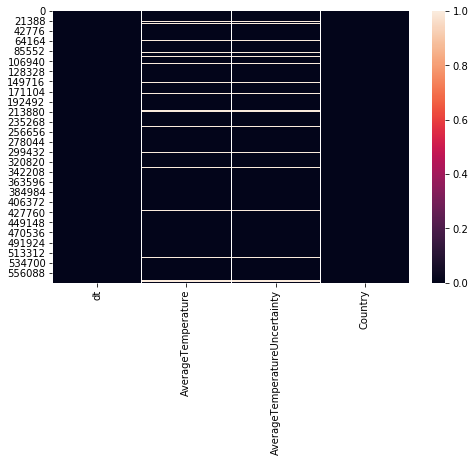

In [6]:
#Missing values using Visualization
sns.heatmap(df.isnull())

In [7]:
#First lets change the dt into datetime datatype and make new columns of month and year
df.loc[:,'dt'] = pd.to_datetime(df['dt'])
df.loc[:,'month'] = [x.month for x in list(df['dt'])]
df.loc[:,'year'] = [x.year for x in list(df['dt'])]

##  Analysis of data Country by Country

Since I am from India, let's start with India to get the basic idea of the data and it's insights. Analysing the country I live in will give the better understanding od the variation and fluctuations of the data and I can relate with it too.

In [8]:
#Extraxting the data of India in seperate dataframe
India = df[df["Country"]=="India"]
India.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
243695,1796-01-01,17.044,2.044,India,1,1796
243696,1796-02-01,19.193,1.359,India,2,1796
243697,1796-03-01,22.319,2.125,India,3,1796
243698,1796-04-01,27.233,1.510,India,4,1796
243699,1796-05-01,30.035,1.338,India,5,1796


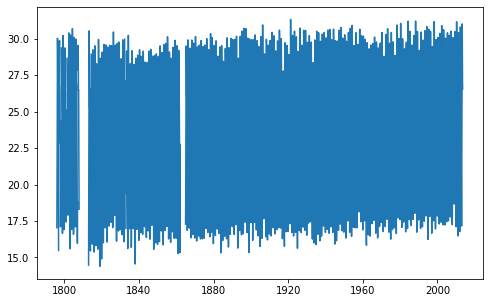

In [9]:
#let's visualize the Average temperature of India over the years
plt.plot(India["dt"],India["AverageTemperature"])
plt.show()

This looks so messy and we certainly can not extract any insights from the above plot. Let us visualize for some particular year e.g. 2000.
Visualization the temperature variation in India in year 2000.

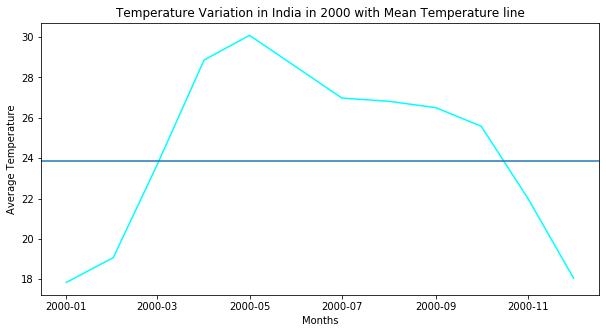

In [10]:
fig = plt.figure(figsize=(10,5))
plt.plot(India.loc[India['year']==2000, 'dt'], India.loc[India['year']==2000,'AverageTemperature'], color="aqua")
plt.title('Temperature Variation in India in 2000 with Mean Temperature line')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.axhline(India["AverageTemperature"].mean())
plt.show()

We can see the highest avearge temperature around the month of May which is true in India. Then the slope decrement when we gro forward to May.

Temeprature in the month range from August(07) to Octorber(09), this is what the rainy season, the temperatue fluctuates between raining and the normal day which results in the high uncertainity. We can also visualize the AverageTemperatureUncertainity to confirm the fact.

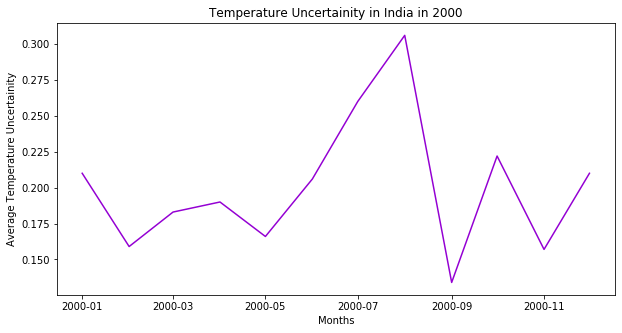

In [11]:
fig = plt.figure(figsize=(10,5))
plt.plot(India.loc[India['year']==2000, 'dt'], India.loc[India['year']==2000,'AverageTemperatureUncertainty'], color="darkviolet")
plt.title('Temperature Uncertainity in India in 2000')
plt.xlabel('Months')
plt.ylabel('Average Temperature Uncertainity')
plt.show()

In [12]:
#Calculating the Avrage Teamperature mean of all the years of India
India_mean = India.AverageTemperature.mean()
print("The Average mean tempertaure of all the years in India is : ", India_mean)

The Average mean tempertaure of all the years in India is :  23.87378947368426


We can also compare the land temperature data of two different years, I am taking 2000 and 2012.

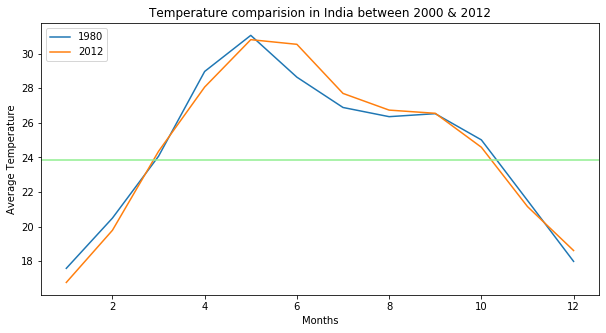

In [13]:
fig = plt.figure(figsize=(10,5))
years = [1980,2012]
for year in years:
    plt.plot(India.loc[India['year']==year, 'month'], India.loc[India['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature comparision in India between 2000 & 2012')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper left')
plt.axhline(India_mean, color = "lightgreen")
plt.show()

### Now let's focus on one particular month of all the years of India.

In [14]:
#Temp in month of june of India
June = India.loc[India.month==6]
June.head(3)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
243700,1796-06-01,29.261,2.953,India,6,1796
243712,1797-06-01,29.880,1.936,India,6,1797
243724,1798-06-01,29.369,1.930,India,6,1798


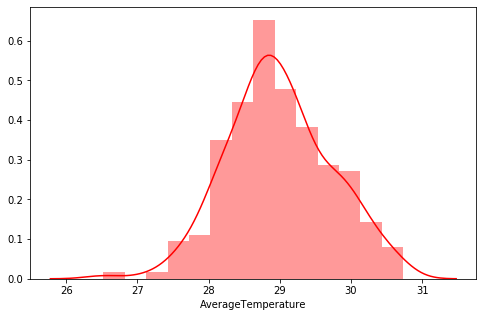

In [15]:
#Histogram of Average temperature of June
sns.distplot(June["AverageTemperature"], color="red")

### Monthwise mean temperature in India

In [16]:
Months = [1,2,3,4,5,6,7,8,9,10,11,12]

Monthwise_mean_temperature = []

Month = ["Januray","February","March","April","May","June","July","August","September","October","November","December"]
for m in Months:
    Mon = India[India.month==m]
    Monthwise_mean_temperature.append(Mon.AverageTemperature.mean())
    print(Month[m-1])
    print(Mon.AverageTemperature.mean())
    print("-"*20)

Januray
16.83940476190476
--------------------
February
19.27278571428572
--------------------
March
23.67032857142856
--------------------
April
27.488966183574888
--------------------
May
29.773555555555575
--------------------
June
28.988679425837322
--------------------
July
26.904785714285694
--------------------
August
26.11651428571428
--------------------
September
25.79360765550241
--------------------
October
24.012086124401907
--------------------
November
20.491306220095694
--------------------
December
17.22410096153846
--------------------


In [17]:
df1 = pd.DataFrame({"MeanTempMonth" : [16.83940476190476,19.27278571428572,23.67032857142856,27.488966183574888,29.773555555555575,
 28.988679425837322,26.904785714285694,26.11651428571428,25.79360765550241,24.012086124401907,20.491306220095694,17.22410096153846]})
df2 = pd.DataFrame({"Months" : [1,2,3,4,5,6,7,8,9,10,11,12]})

frames = [df1, df2]

Dataframe_month = pd.concat(frames, axis=1)

In [18]:
Dataframe_month 

,MeanTempMonth,Months
0,16.839405,1
1,19.272786,2
2,23.670329,3
3,27.488966,4
4,29.773556,5
5,28.988679,6
6,26.904786,7
7,26.116514,8
8,25.793608,9
9,24.012086,10


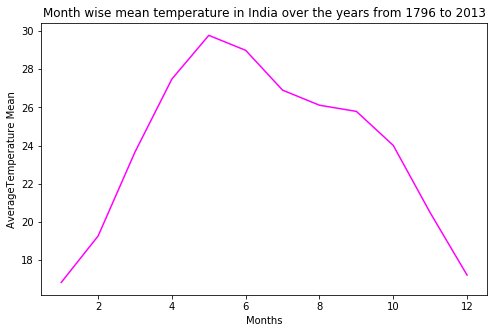

In [19]:
plt.plot( Dataframe_month["Months"], Dataframe_month["MeanTempMonth"], color="magenta")
plt.xlabel("Months")
plt.ylabel("AverageTemperature Mean")
plt.title("Month wise mean temperature in India over the years from 1796 to 2013")
plt.show()

### Now let us consider another random country, I am considering "Switzerland".

In [20]:
#Extracting data of Switzerland
Switzerland = df[df.Country == "Switzerland"]
Switzerland.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
508635,1743-11-01,3.572,2.094,Switzerland,11,1743
508636,1743-12-01,NaN,NaN,Switzerland,12,1743
508637,1744-01-01,NaN,NaN,Switzerland,1,1744
508638,1744-02-01,NaN,NaN,Switzerland,2,1744
508639,1744-03-01,NaN,NaN,Switzerland,3,1744


In [21]:
#Mean Average Temperature of Switzeland of all the years
MeanSwit = Switzerland.AverageTemperature.mean()
MeanSwit

6.992051484523055

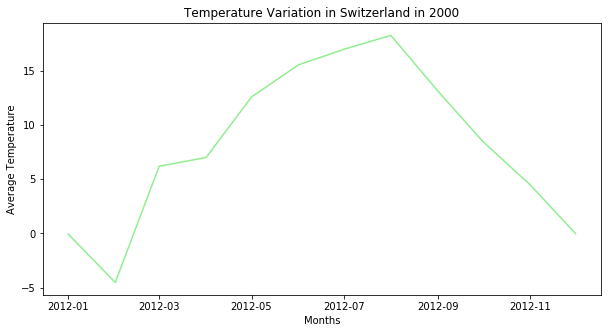

In [22]:
fig = plt.figure(figsize=(10,5))
plt.plot(Switzerland.loc[Switzerland['year']==2012, 'dt'], Switzerland.loc[Switzerland['year']==2012,'AverageTemperature'], color="lightgreen")
plt.title('Temperature Variation in Switzerland in 2000')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

Graph shows the Highest Average temperature in the month of August which is pretty bizzare XD, as in india we have summer in the month around May to July. One thing to consider is the drop from the month of January to month of Feburary, maximize the drop in the month of February

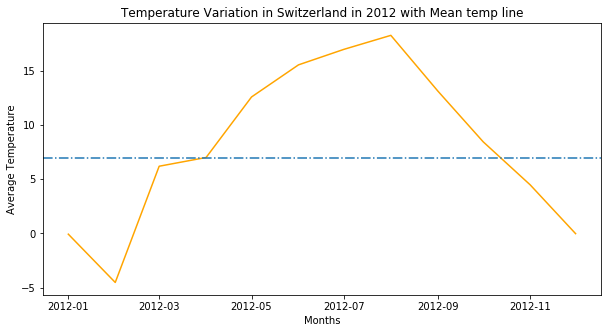

In [23]:
fig = plt.figure(figsize=(10,5))
plt.plot(Switzerland.loc[Switzerland['year']==2012, 'dt'], Switzerland.loc[Switzerland['year']==2012,'AverageTemperature'], color="orange")
plt.axhline(MeanSwit, ls = "-.")
plt.title('Temperature Variation in Switzerland in 2012 with Mean temp line')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.show()

## Countries with Maximun and Minimun Average Temperatures

In [24]:
#Country with Min Temp
Min = df[df.AverageTemperature == df.AverageTemperature.min()]

#Country with Max Temp
Max = df[df.AverageTemperature == df.AverageTemperature.max()]

In [25]:
print("Country having Minimun temperature : ")
print(Min.Country)
print(Min.AverageTemperature)

Country having Minimun temperature : 
210436    Greenland
Name: Country, dtype: object
210436   -37.658
Name: AverageTemperature, dtype: float64


In [26]:
print("Country having Maximun temperature : ")
print(Max.Country)
print(Max.AverageTemperature)

Country having Maximun temperature : 
284851    Kuwait
Name: Country, dtype: object
284851    38.842
Name: AverageTemperature, dtype: float64


### Kuwait - Maximun Average Temperature

In [27]:
Kuwait_mean = df['AverageTemperature'].mean()
Kuwait = df[df.Country == "Kuwait"]

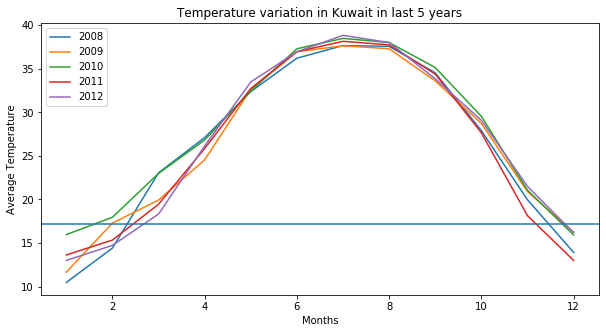

In [28]:
fig = plt.figure(figsize=(10,5))
years = [2008,2009,2010,2011,2012]
for year in years:
    plt.plot(Kuwait.loc[Kuwait['year']==year, 'month'], Kuwait.loc[Kuwait['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature variation in Kuwait in last 5 years')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper left')
plt.axhline(Kuwait_mean)
plt.show()

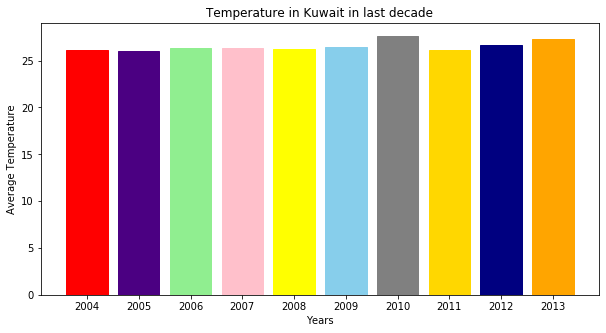

In [29]:
mean_by_year = []
years = list(df['year'].unique()[-10:])
for year in years:
    df1 = Kuwait[Kuwait['year']==year]
    mean_by_year.append(df1['AverageTemperature'].mean())
    
fig = plt.figure(figsize=(10,5))
barlist = plt.bar(years, mean_by_year)
barlist[0].set_color('red')
barlist[1].set_color('indigo')
barlist[2].set_color('lightgreen')
barlist[3].set_color('pink')
barlist[4].set_color('yellow')
barlist[5].set_color('skyblue')
barlist[6].set_color('gray')
barlist[7].set_color('gold')
barlist[8].set_color('navy')
barlist[9].set_color('orange')
plt.xticks(np.arange(2004,2014),labels=years)
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.title('Temperature in Kuwait in last decade')
plt.show()

### Greenland - Minimun Average Temperature

In [30]:
Greenland_mean = df['AverageTemperature'].mean()
Greenland = df[df.Country == "Greenland"]

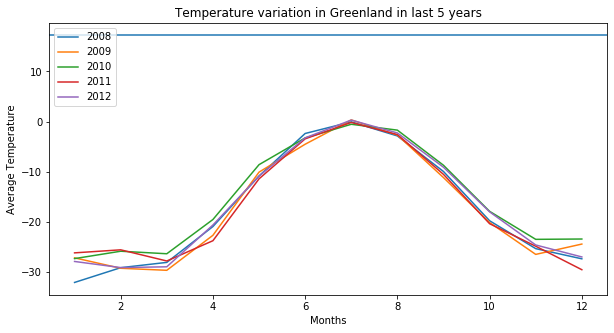

In [31]:
fig = plt.figure(figsize=(10,5))
years = [2008,2009,2010,2011,2012]
for year in years:
    plt.plot(Greenland.loc[Greenland['year']==year, 'month'], Greenland.loc[Greenland['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature variation in Greenland in last 5 years')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend(loc='upper left')
plt.axhline(Greenland_mean)
plt.show()

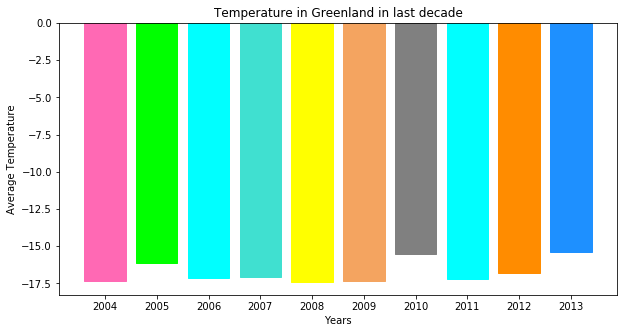

In [32]:
mean_by_year = []
years = list(df['year'].unique()[-10:])
for year in years:
    df1 = Greenland[Greenland['year']==year]
    mean_by_year.append(df1['AverageTemperature'].mean())
    
fig = plt.figure(figsize=(10,5))
barlist = plt.bar(years, mean_by_year)
barlist[0].set_color('hotpink')
barlist[1].set_color('lime')
barlist[2].set_color('cyan')
barlist[3].set_color('turquoise')
barlist[4].set_color('yellow')
barlist[5].set_color('sandybrown')
barlist[6].set_color('gray')
barlist[7].set_color('aqua')
barlist[8].set_color('darkorange')
barlist[9].set_color('dodgerblue')
plt.xticks(np.arange(2004,2014),labels=years)
plt.title('Temperature in Greenland in last decade')
plt.xlabel("Years")
plt.ylabel("Average Temperature")
plt.show()

## Now let's visualize the uncertaininty i.e. fluctuation

In [33]:
Max_Fluctuation_Country = df[df.AverageTemperatureUncertainty== df.AverageTemperatureUncertainty.max()].Country
Min_Fluctuation_Country = df[df.AverageTemperatureUncertainty== df.AverageTemperatureUncertainty.min()].Country
print("Maximun Fluctuation :")
print(Max_Fluctuation_Country)
print("Minimun Fluctuatio :")
print(Min_Fluctuation_Country)

Maximun Fluctuation :
139544    Denmark (Europe)
Name: Country, dtype: object
Minimun Fluctuatio :
430072    Romania
Name: Country, dtype: object


### Let's visualize the countries with high an low fluctuation/Uncertainity

In [34]:
Sorted_by_Fluctuation = df.sort_values("AverageTemperatureUncertainty")
Sorted_by_Fluctuation.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,month,year
430072,1996-11-01,6.843,0.052,Romania,11,1996
557785,2010-10-01,10.913,0.053,United States,10,2010
557390,1977-11-01,2.694,0.054,United States,11,1977
34385,1977-11-01,1.659,0.055,Asia,11,1977
557168,1959-05-01,14.240,0.055,United States,5,1959


In [35]:
Uncertain = Sorted_by_Fluctuation[Sorted_by_Fluctuation.AverageTemperatureUncertainty <= 0.06]

### Minimum fluctuation

In [36]:
Romania = df[df.Country == "Romania"]

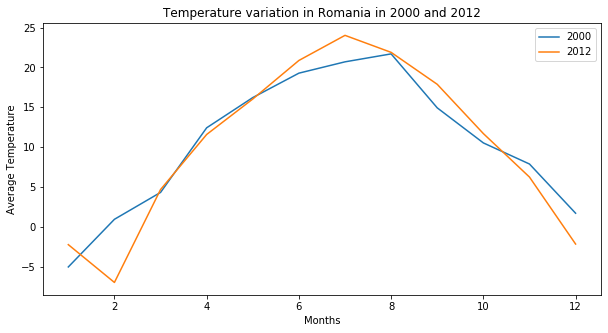

In [37]:
fig = plt.figure(figsize=(10,5))
years = [2000,2012]
for year in years:
    plt.plot(Romania.loc[Romania['year']==year, 'month'], Romania.loc[Romania['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature variation in Romania in 2000 and 2012')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

### Maximum Fluctuation

In [38]:
Denmark = df[df.Country == "Denmark"]

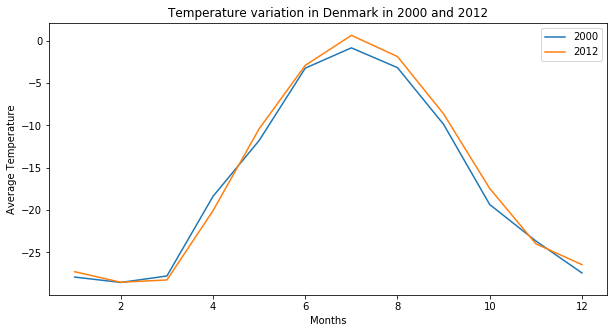

In [39]:
fig = plt.figure(figsize=(10,5))
years = [2000,2012]
for year in years:
    plt.plot(Denmark.loc[Denmark['year']==year, 'month'], Denmark.loc[Denmark['year']==year,'AverageTemperature'], label=year)
plt.title('Temperature variation in Denmark in 2000 and 2012')
plt.xlabel('Months')
plt.ylabel('Average Temperature')
plt.legend()
plt.show()

# Mapping Countries on the World Map

Top 10 Countries with High Average Temperature

In [40]:
#Sorting the dataframe according to Average Temperature

df_SortAvTemp = df.sort_values("AverageTemperature", ascending = False)
df_SortAvTemp["Country"][:5000].unique()

array(['Kuwait', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Iraq',
       'Saudi Arabia', 'Algeria', 'Mali', 'Djibouti', 'Oman', 'Niger',
       'Mauritania', 'Tunisia', 'Burkina Faso', 'Chad', 'Libya',
       'Senegal', 'Yemen', 'Syria', 'Egypt'], dtype=object)

In [41]:
#Define a dictionary containing  data of top 10 high average temperature values  
data = {'Country':['Kuwait', 'United Arab Emirates', 'Qatar', 'Bahrain', 'Iraq',
       'Saudi Arabia', 'Algeria', 'Mali', 'Djibouti', 'Oman', 'Niger']}  
    
#Convert the dictionary into DataFrame  
Tf = pd.DataFrame(data)  
    
#Observe the result  
Tf  

,Country
0,Kuwait
1,United Arab Emirates
2,Qatar
3,Bahrain
4,Iraq
5,Saudi Arabia
6,Algeria
7,Mali
8,Djibouti
9,Oman


### Working with Geopy and Folium.

In [42]:
from geopy.exc import GeocoderTimedOut 
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 
   
# declare an empty list to store 
# latitude and longitude of values  
# of Country column 
longitude = [] 
latitude = [] 
   
# function to find the coordinate 
# of a given Country  
def findGeocode(Country): 
       
    # try and catch is used to overcome 
    # the exception thrown by geolocator 
    # using geocodertimedout   
    try: 
          
        # Specify the user_agent as your 
        # app name it should not be none 
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(Country) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(Country)     
  
# each value from Country column 
# will be fetched and sent to 
# function find_geocode    
for i in (Tf["Country"]): 
      
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  
        # function is stored into 
        # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a Country not 
    # found, insert "NaN" indicating  
    # missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)

In [43]:
#Now add this column to dataframe 
Tf["Longitude"] = longitude 
Tf["Latitude"] = latitude 

Tf

,Country,Longitude,Latitude
0,Kuwait,47.497948,29.273396
1,United Arab Emirates,53.999483,24.000249
2,Qatar,51.229529,25.333698
3,Bahrain,50.534461,26.155125
4,Iraq,44.174977,33.095579
5,Saudi Arabia,42.352833,25.624262
6,Algeria,2.999983,28.000027
7,Mali,-2.290024,16.370036
8,Djibouti,42.845306,11.814597
9,Oman,57.003690,21.000029


In [44]:
locations = Tf[['Latitude', 'Longitude']]
locationlist = locations.values.tolist()
len(locationlist)
locationlist[7]

[16.3700359, -2.2900239]

In [45]:
#Calculating the mean of longitude and latitude and mappting them so that we can have the basic idea of where possibly can
# these countries lies.
import folium

long = Tf["Longitude"].mean()
lat = Tf["Latitude"].mean()


#Mapping avg. position on world map through folium
Temp_Map = folium.Map(
    location=[long, lat],
    zoom_start=3,
    tiles='OpenStreetMap'
)

for log,lat in zip(Tf["Longitude"], Tf["Latitude"]):
    folium.Marker(
    location=[log,lat],
    popup='Timberline Lodge',
    icon=folium.Icon(icon='cloud')).add_to(Temp_Map )

In [46]:
Temp_Map 

Concluding the today's story with this map which is stating the top 10 countries with high average temperature are from the Egypt and Africa. We can also map countries having the lowest temperature of all the countires.

In [47]:
Temp_Map.save("Temperature Mapping.html")

### Github might not show th map right here, you can refer to the html file in the main branch folder.

## That's it with this Story for now! Will be back with another story.